In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [30]:
df = pd.read_csv('advertising.csv')

In [31]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

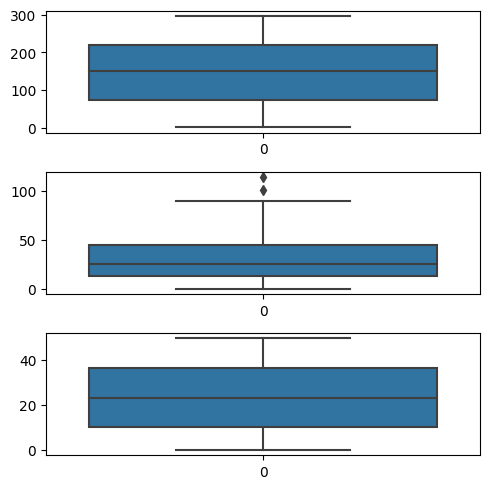

In [36]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

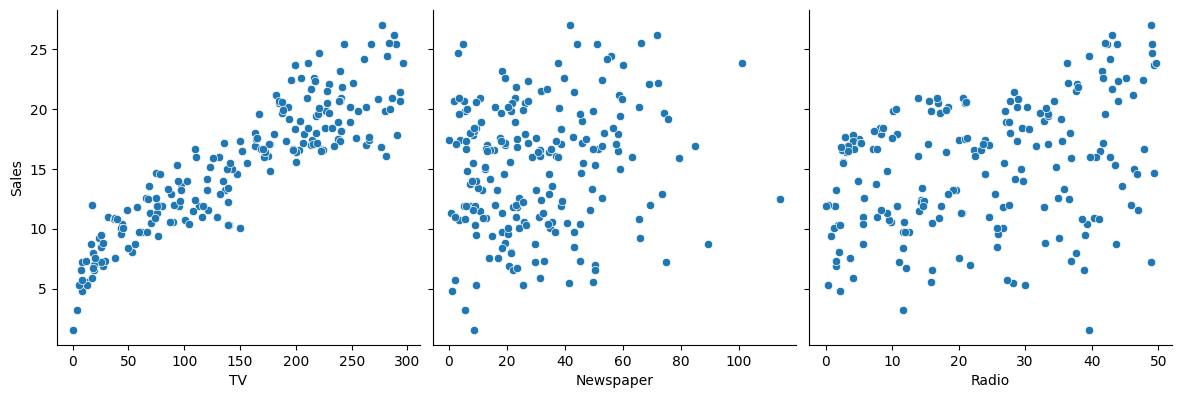

In [37]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>]], dtype=object)

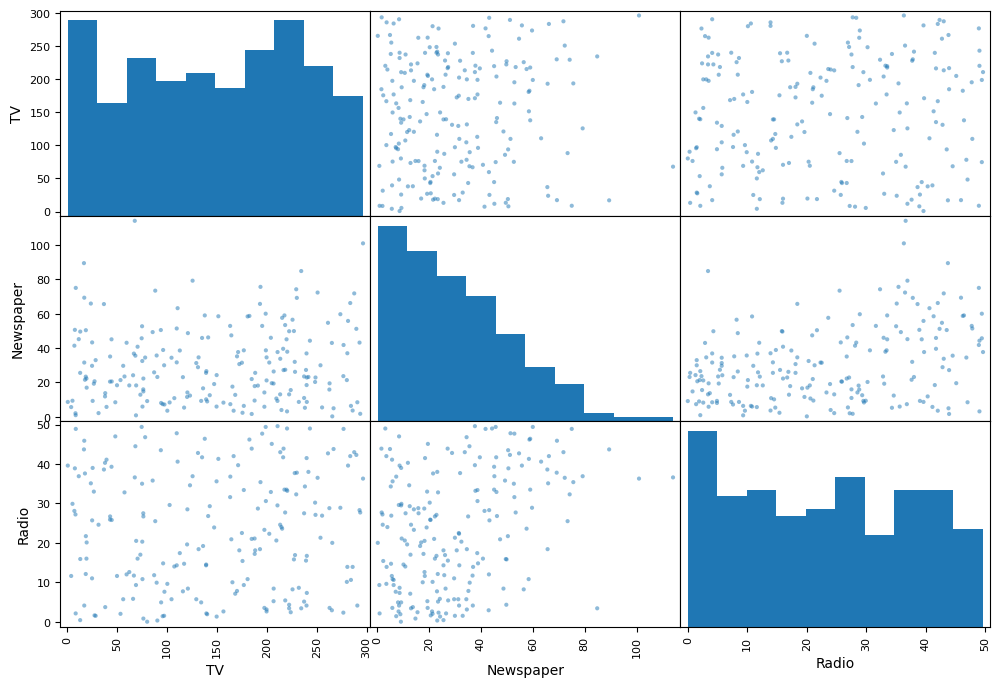

In [56]:
from pandas.plotting import scatter_matrix
#check some attributes
attributes= ["TV","Newspaper","Radio"]
scatter_matrix(df[attributes], figsize = (12,8))

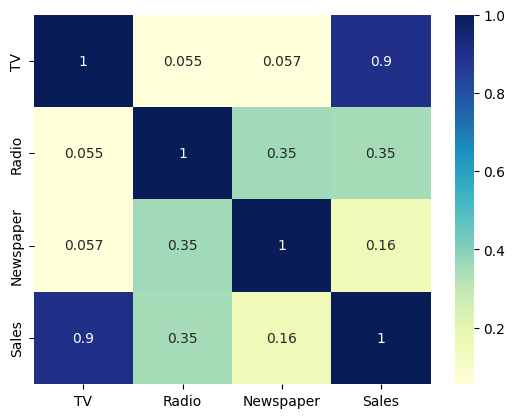

In [38]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Building Model

### Linear Regression

In [39]:
X = df['TV']
y = df['Sales']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
import statsmodels.api as sm

In [42]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [43]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        13:00:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

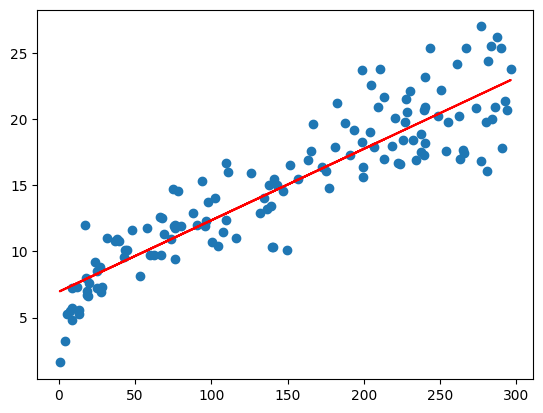

In [45]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### Evaluation Of Model

In [46]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

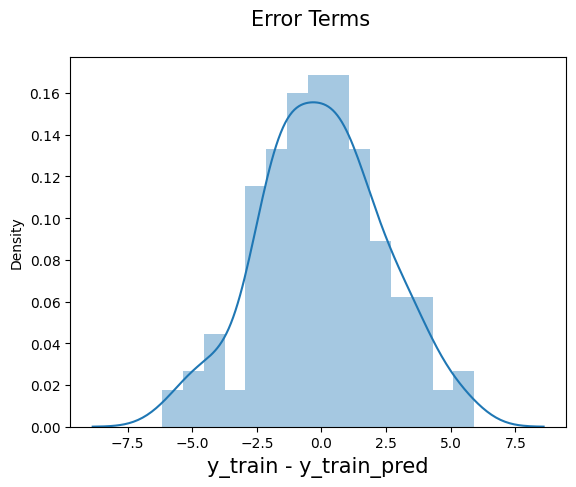

In [47]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

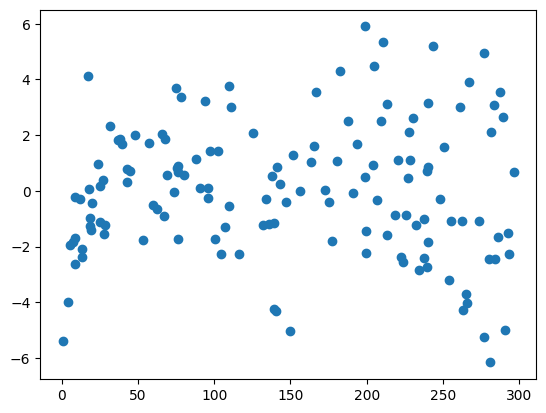

In [48]:
plt.scatter(X_train,res)
plt.show()

In [49]:

X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [50]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

#### Checking the R-squared on the test set

In [53]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

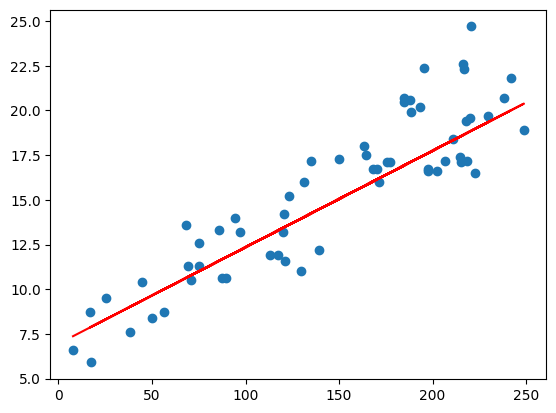

In [54]:


plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

